In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
cd ..

/users/PAS2232/aeyobd/surp


In [3]:
import sys
sys.path.append("..")

from model_comparer import ModelComparer
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
from plotting_utils import fig_saver, legend_outside, fancy_legend
import gas_phase_data
import numpy as np
import apogee_analysis as aah
from vice_utils import load_model

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [4]:
import surp
import multizone_sim
import vice
import pickle
from vice_to_pickle import vice_model, pickle_output, plot_mean_track
import pandas as pd
from dataclasses import dataclass
import rc_params
from plotting_utils import fig_saver

In [5]:
sf = fig_saver("./carbon_paper")

In [6]:
@dataclass
class model_id():
    agb: str = None
    eta: str = None
    f_agb: str = None
    beta: str = None
    name: str = None
    version: str = ""

In [7]:
def find_model(id):
    """
    Finds the pickled model with either the given name or the parameters 
    and returns the vice_model object
    """
    if id.name is None:
        name = id.agb + "_f" + id.f_agb + "_Z" + id.beta + "_eta" + id.eta +id.version
    else:
        name = id.name
    pickle_name = "pickles/" + name + ".pickle"
    return vice_model.from_file(pickle_name)

In [8]:
def plot_coofe(models, o0=-0.0, ax=None):
    
    if ax is None:
        ax = plt.gca()
    
    name_0 = list(models.keys())[0]

    for o in [o0]:
        for name, model in models.items():
            model.plot_mean_coofe(xlim=(-0.6, 0.4), label=name, plot_data=name==name_0, o_h_0=o, star_group="apogee", ax=ax)
        ax.set_title("[O/H] = %1.1f" % o)
        # legend_outside()  
        # plt.show()


In [9]:
def compare_coofe_stars(models):
    for o in [-0.2, 0, 0.2]:
        for name, model in models.items():
            model.plot_coofe(star_group="apogee", o_h_0=o)
            plt.xlim(-0.6, 0.4)
            plt.title("%s, [o/h]=%1.1f" % (name, o))
            plt.show()
            
def compare_cooh_stars(models):
    for name, model in models.items():
        model.plot_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.6), label=name)
        plt.title(name)
        plt.show()

In [10]:
def compare_cooh(models, ax=None):
    if ax is None:
        ax = plt.gca()
        
    name_0 = list(models.keys())[0]
    for name, model in models.items():
        f = model.plot_mean_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.4), label=name, plot_data=name==name_0, ax=ax)
    # legend_outside()
    return f    


In [11]:
def compare(names, labels):
    models = {label: find_model(name) for name, label in zip(names, labels)}
    
    fig, axs = dual_plot()
    
    plt.sca(axs[0])
    compare_cooh(models)  

    axs[0].set(
        xlabel = "[O/H]",
        ylabel = "[C/O]", 
        xlim = (-0.6, 0.4), 
        ylim = (-0.2, 0.4),
        xticks = [-0.6, -0.4, -0.2, 0, 0.2]
    )
    
    plt.sca(axs[1])
    plot_coofe(models)
    fancy_legend()
    
    axs[1].set(
        xlabel = "[O/Fe]",
        ylabel = "",
        title = "",
        xlim = (-0.15, 0.4),
       # xticks = [-0.1, -0.2, -0.1, 0, 0.1]
    )


# SFH History

In [12]:
fiducial = find_model(model_id(agb="cristallo11", f_agb="0.2", eta="1", beta="0.3", version="_v1_lateburst"))

In [13]:
def dual_plot():
    fig = plt.figure(figsize=(10, 5))
    gs = fig.add_gridspec(1, 2, wspace=0)
    axs = gs.subplots(sharey=True)
    
    return fig, axs

In [14]:
h = fiducial.history.set_index(["time", "R"])

ValueError: Can only output finite numbers in PDF

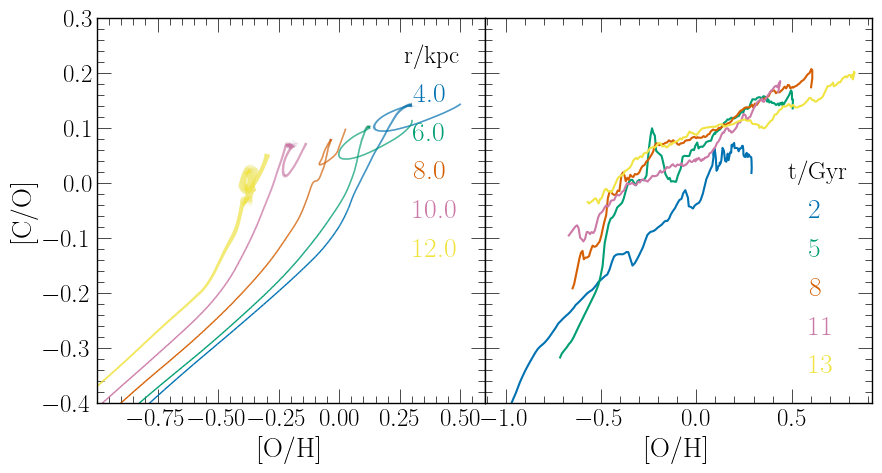

In [38]:
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2, wspace=0)
axs = gs.subplots(sharey=True)

plt.sca(axs[0])
fiducial.plot_R_slices("[o/h]", "[c/o]", ax=axs[0])

# for t in [2, 5, 8, 11, 13]:
#     for R in [4, 6, 8, 10, 12]:
#         df = h.loc[t, R]
#         plt.scatter(df["[o/h]"], df["[c/o]"])

axs[0].set(
    xlim=(-1, 0.6),
    ylim=(-0.4, 0.3),
    xlabel="[O/H]",
    ylabel="[C/O]",
    xticks=(-0.75, -0.5, -0.25, 0, 0.25, 0.5)
)

fiducial.plot_t_slices("[o/h]", "[c/o]", ax=axs[1])
axs[1].set(
    ylabel="",
    xlabel="[O/H]"
)
sf("evo_tracks")

# Potentail addition

In [ ]:
from plotting_utils import plot_density_line

[Text(0, 0.5, ''), Text(0.5, 0, '[O/Fe]')]

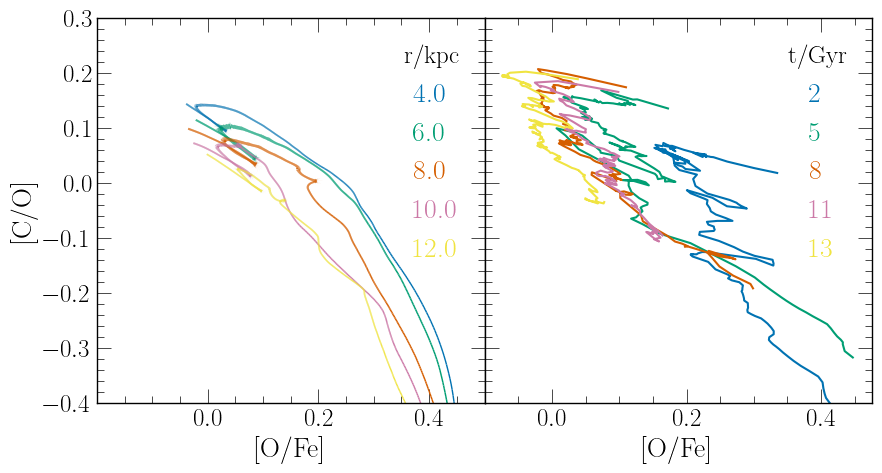

In [39]:
fig = plt.figure(figsize=(10, 5))
gs = fig.add_gridspec(1, 2, wspace=0)
axs = gs.subplots(sharey=True)

plt.sca(axs[0])
fiducial.plot_R_slices("[o/fe]", "[c/o]", ax=axs[0])
axs[0].set(
    xlim=(-0.2, 0.5),
    ylim=(-0.4, 0.3),
    xlabel="[O/Fe]",
    ylabel="[C/O]",
    xticks=(0, 0.2, 0.4)
)


fiducial.plot_t_slices("[o/fe]", "[c/o]", ax=axs[1])
axs[1].set(
    ylabel="",
    xlabel="[O/Fe]"
)
# sf("evo_tracks_fe")

# AGB out of the box models

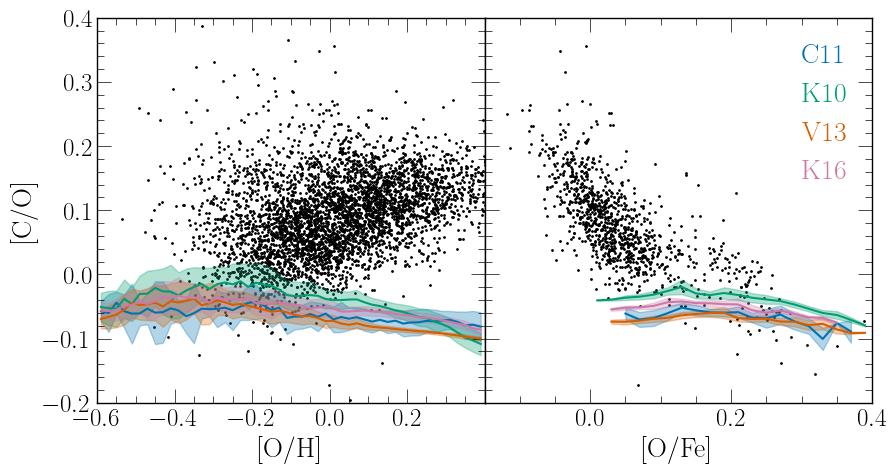

In [17]:
names = []
for s in ["fiducial", "k10", "v13", "k16"]:
    names.append(model_id(name=s))
labels = ["C11", "K10", "V13", "K16"]
models = {label: find_model(name) for name, label in zip(names, labels)}

compare(names, labels)
sf("agb_models")

In [31]:
ls pickles/*v1_lateburst*

pickles/cristallo11_f0.1_Z0.4_eta1_v1_lateburst.pickle
pickles/cristallo11_f0.2_Z0.3_eta1_v1_lateburst.pickle
pickles/cristallo11_f0.2_Z0.4_eta1_v1_lateburst.pickle
pickles/cristallo11_f0.4_Z0.4_eta1_v1_lateburst.pickle
pickles/karakas10_f0.1_Z0.4_eta1_v1_lateburst.pickle
pickles/karakas10_f0.2_Z0.4_eta1_v1_lateburst.pickle
pickles/karakas10_f0.4_Z0.4_eta1_v1_lateburst.pickle
pickles/karakas16_f0.1_Z0.4_eta1_v1_lateburst.pickle
pickles/karakas16_f0.2_Z0.4_eta1_v1_lateburst.pickle
pickles/karakas16_f0.4_Z0.4_eta1_v1_lateburst.pickle
pickles/ventura13_f0.1_Z0.4_eta1_v1_lateburst.pickle
pickles/ventura13_f0.2_Z0.4_eta1_v1_lateburst.pickle
pickles/ventura13_f0.4_Z0.4_eta1_v1_lateburst.pickle


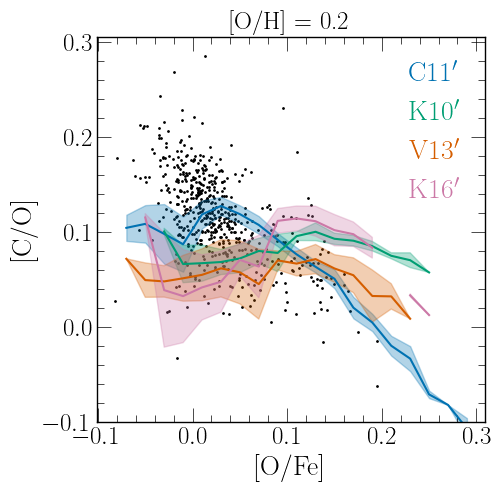

In [36]:
names = []
for s in ["cristallo11_f0.4_Z0.4_eta1_v1", "karakas10_f0.2_Z0.4_eta1_v1_lateburst", "ventura13_f0.2_Z0.4_eta1_v1_lateburst", "karakas16_f0.4_Z0.4_eta1_v1_lateburst"]:
    names.append(model_id(name=s))
labels = ["C11$'$", "K10$'$", "V13$'$", "K16$'$"]
models = {label: find_model(name) for name, label in zip(names, labels)}
plot_coofe(models, 0.2)
fancy_legend()
plt.ylim(-0.1)
plt.xlabel("[O/Fe]")
plt.ylabel("[C/O]")
sf("abg_adj_z")

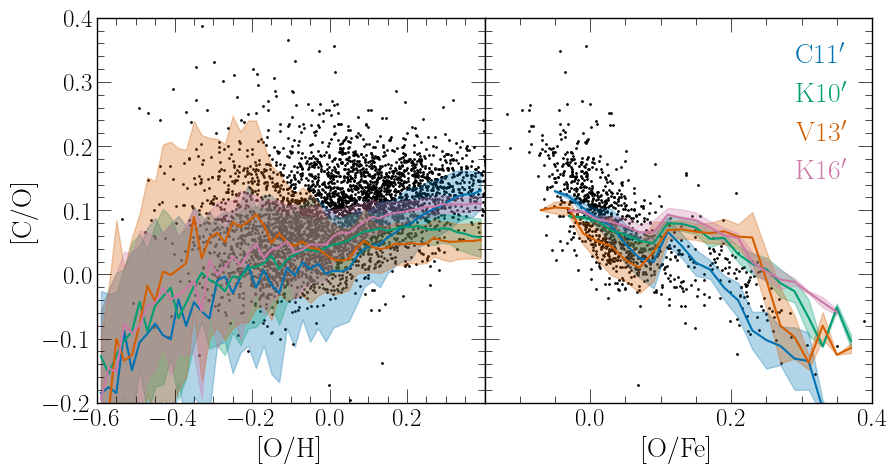

In [25]:
compare(names, labels)
sf("agb_adj")

In [32]:
names = []

for f in labels:
    agb = "cristallo11"
    beta = "0.3"
    eta = "1"
    names.append(model_id(agb=agb, beta=beta, eta=eta, f_agb=f))

labels = [r"$f = 0.05$", r"$f = 0.2$", r"$f = 0.5$"]
 
compare(names, labels)

FileNotFoundError: [Errno 2] No such file or directory: "pickles/cristallo11_fC11$'$_Z0.3_eta1.pickle"

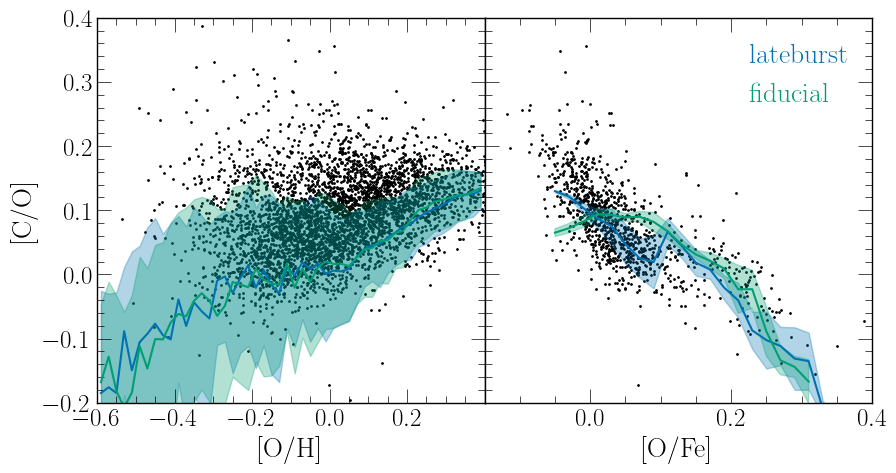

In [90]:
names = []
labels = ["lateburst", "fiducial"]

for agb in ["cristallo11"]:
    beta = "0.4"
    eta = "1"
    f = "0.4"
    for v in ["_v1_lateburst", "_v1"]:
        names.append(model_id(agb=agb, beta=beta, eta=eta, f_agb=f, version=v))

compare(names, labels)


In [ ]:
compare_coofe

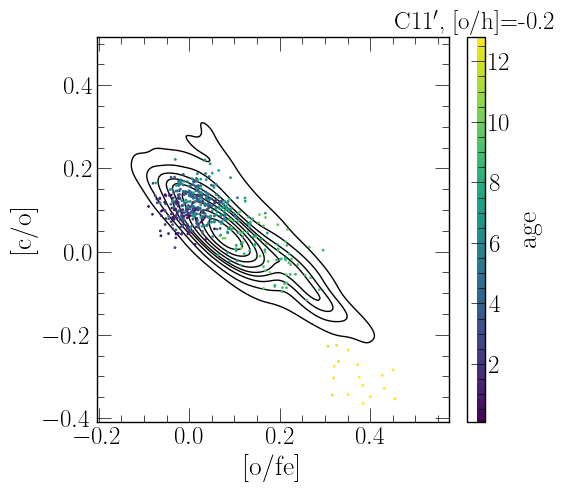

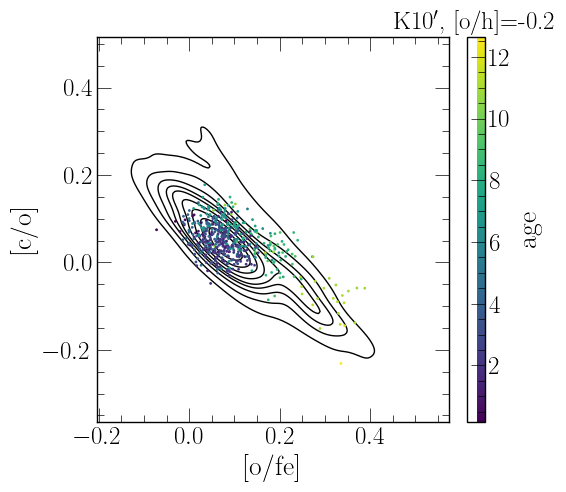

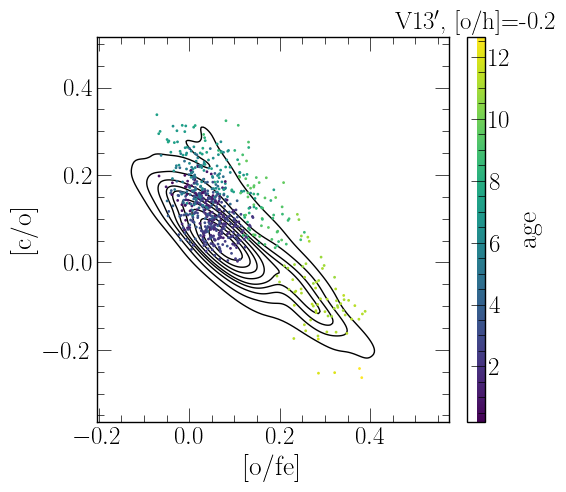

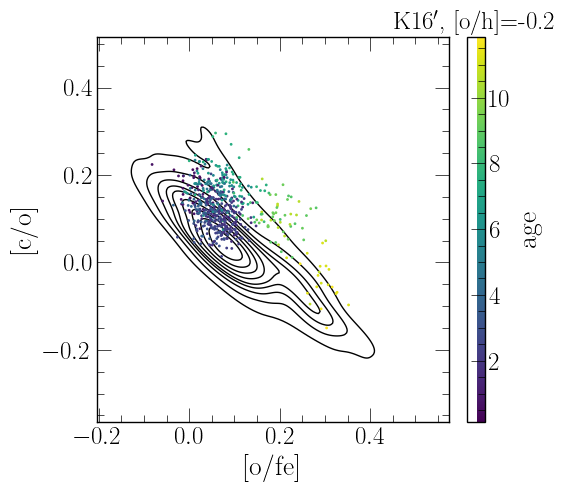

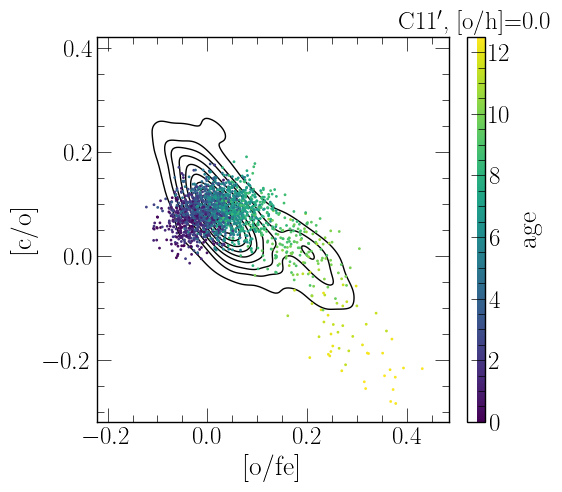

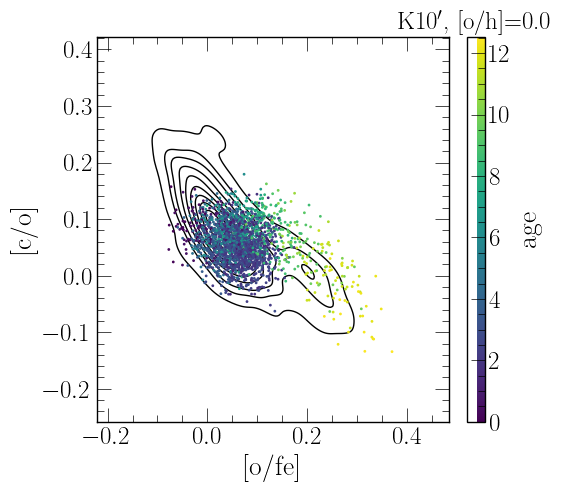

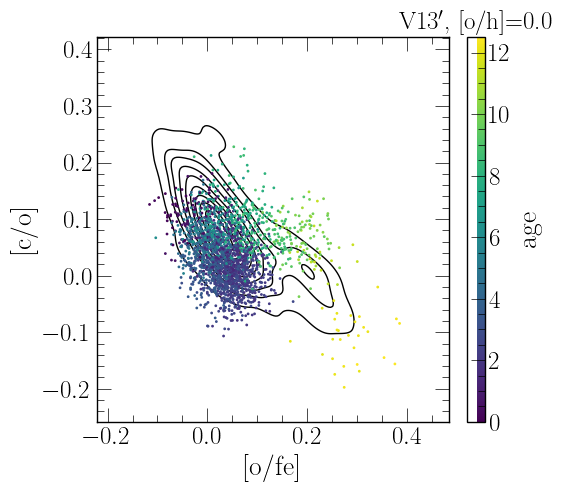

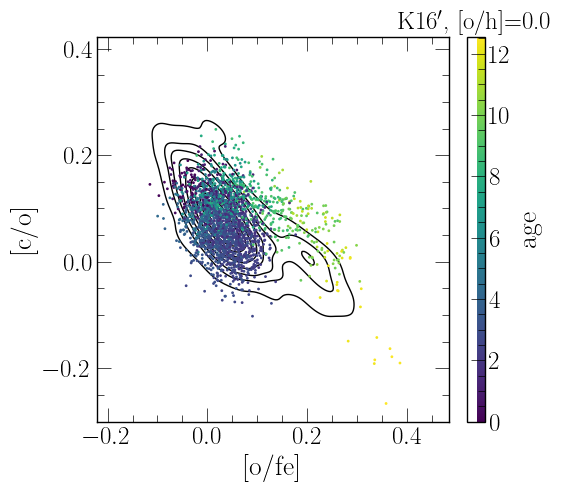

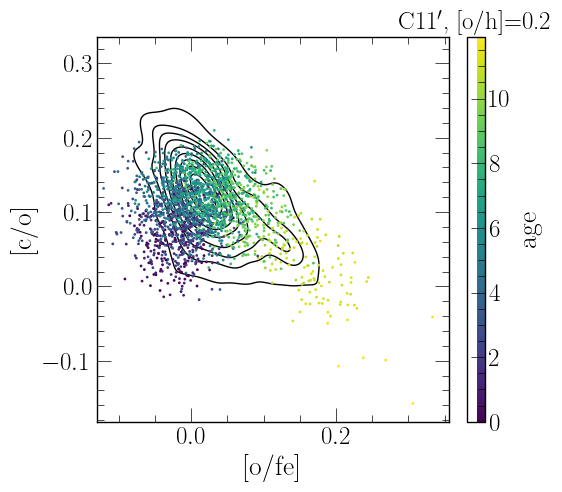

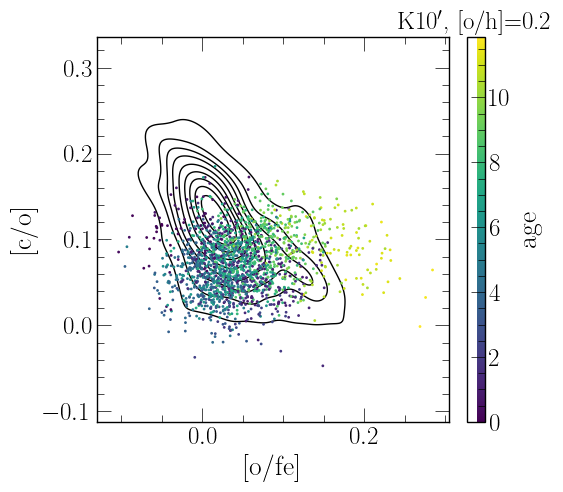

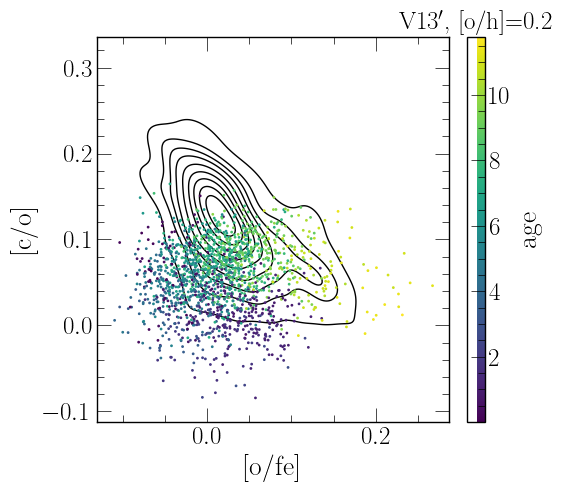

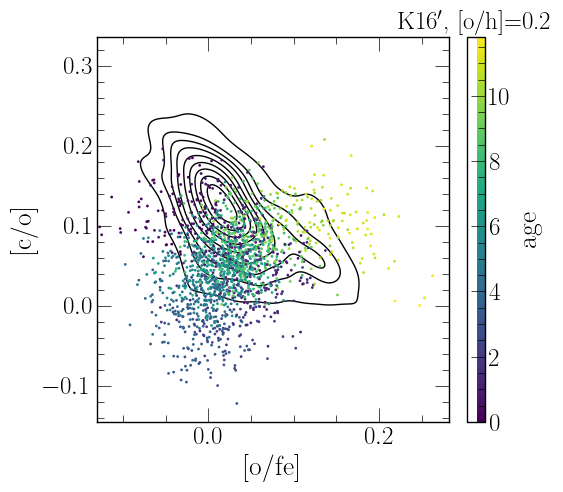

In [37]:
models = {label: find_model(name) for name, label in zip(names, labels)}

compare_coofe_stars(models)

Text(0, 0.5, '[C/O]')

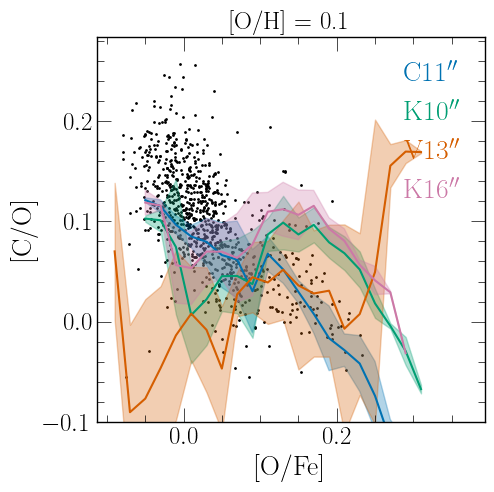

In [34]:
models = {label: find_model(name) for name, label in zip(names, labels)}
plot_coofe(models, 0.1)
fancy_legend()
plt.ylim(-0.1)
plt.xlabel("[O/Fe]")
plt.ylabel("[C/O]")


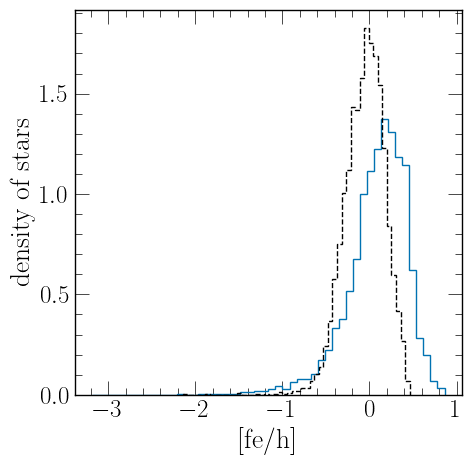

In [37]:
fiducial.plot_mdf("[fe/h]")

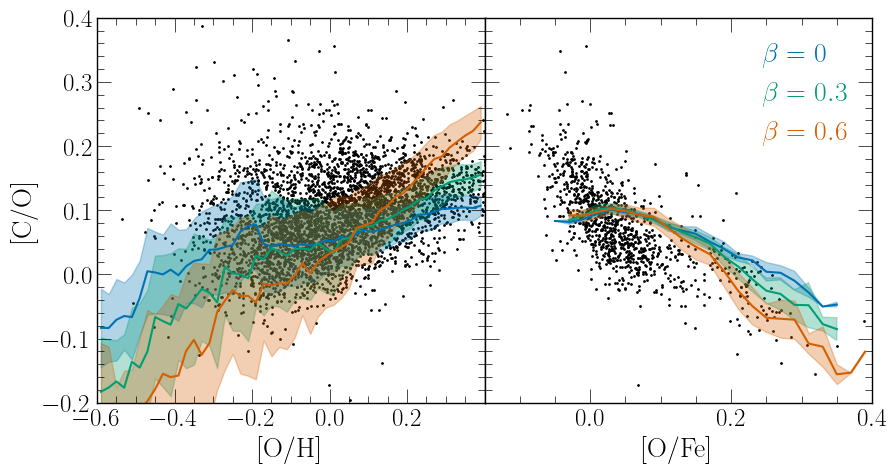

In [141]:
names = []
labels = ["0.15", "0.3", "0.5"]
for beta in labels:
    agb = "cristallo11"
    f = "0.2"
    eta = "1"
    names.append(model_id(agb=agb, beta=beta, eta=eta, f_agb=f))

labels = [r"$\beta = 0$", r"$\beta = 0.3$", r"$\beta = 0.6$"]
 
compare(names, labels)

sf("c11_beta")

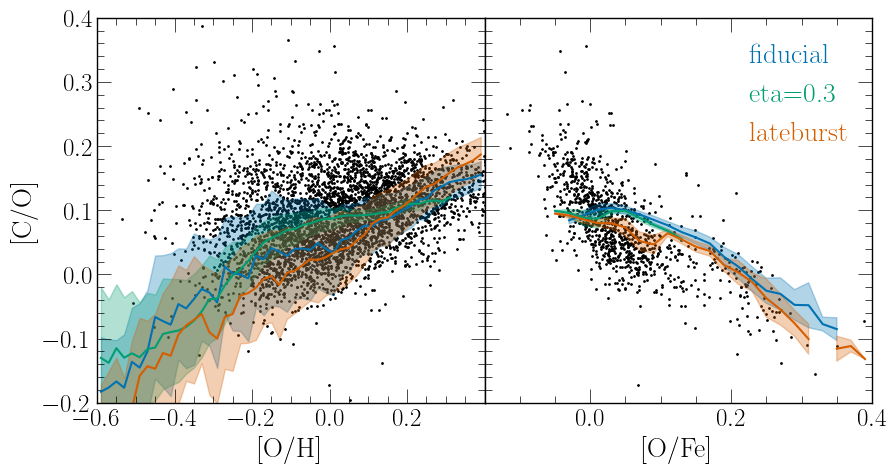

In [95]:
names = []
labels = ["cristallo11_f0.2_Z0.3_eta1", "cristallo11_f0.2_Z0.3_eta0.3", "cristallo11_f0.2_Z0.4_eta1_v1_lateburst"]
for s in labels:
    names.append(model_id(name=s))

labels = ["fiducial", "eta=0.3", "lateburst"]

compare(names, labels) 
sf("cooh_eta_lateburst")

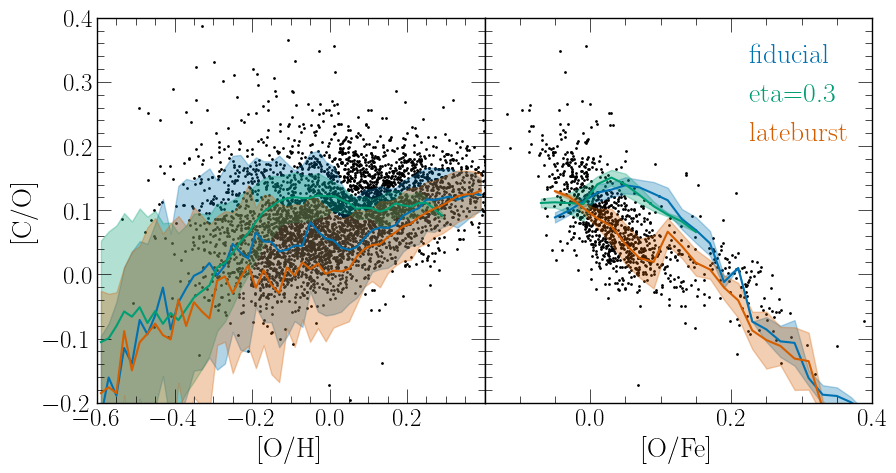

In [101]:
names = []
labels = ["cristallo11_f0.4_Z0.3_eta1", "cristallo11_f0.4_Z0.3_eta0.3", "cristallo11_f0.4_Z0.4_eta1_v1_lateburst"]
for s in labels:
    names.append(model_id(name=s))

labels = ["fiducial", "eta=0.3", "lateburst"]

compare(names, labels) 

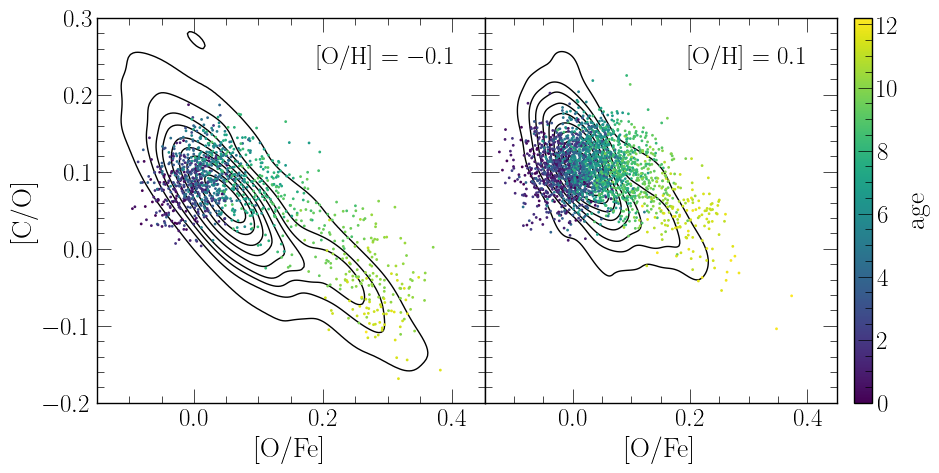

In [143]:
fig, axs = dual_plot()

plt.sca(axs[0])
fiducial.plot_coofe(star_group="apogee", o_h_0=-0.1, colorbar=False)
axs[0].set(
    xlabel="[O/Fe]",
    ylabel="[C/O]",
    xlim=(-0.15, 0.45),
    ylim=(-0.2, 0.3)
)
plt.text(0.75, 0.9, "[O/H] $=-0.1$", horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)

plt.sca(axs[1])
fiducial.plot_coofe(star_group="apogee", o_h_0=0.1, colorbar=True)
axs[1].set(
    xlabel="[O/Fe]",
    xlim=(-0.15, 0.45)
)

axs[1].text(0.75, 0.9, "[O/H] $=0.1$", horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

sf("coofe_stars")

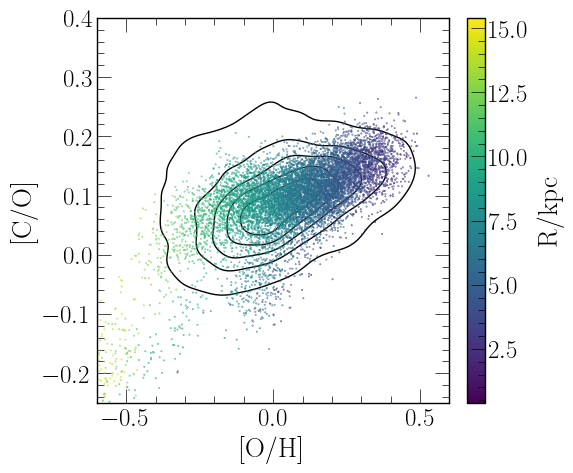

In [144]:
fig, ax = plt.subplots()

fiducial.plot_stars("[o/h]", "[c/o]", c="r_origin", c_label="R/kpc", star_group="apogee", s=0.05)

ax.set(
    xlabel="[O/H]",
    ylabel="[C/O]",
    xlim=(-0.6, 0.6), 
    ylim=(-0.25, 0.4)
)

sf("cooh_stars")

In [66]:
fiducial.plot_stars?

Signature:
fiducial.plot_stars(
    x,
    y,
    c=None,
    c_label=None,
    xlim=None,
    star_group='all',
    **kwargs,
)
Docstring: <no docstring>
File:      ~/surp/vice_to_pickle.py
Type:      method


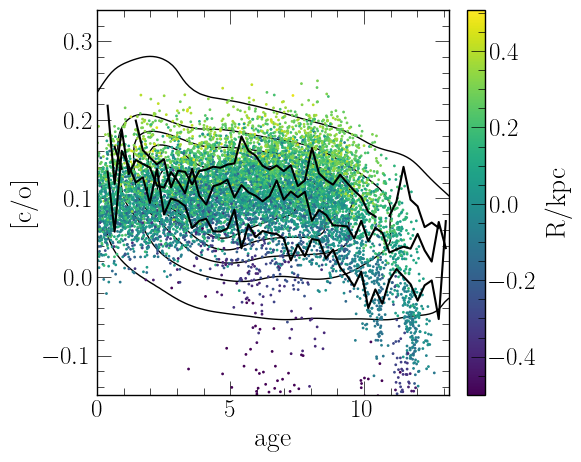

In [70]:
fig, ax = plt.subplots()

fiducial.plot_stars("age", "[c/o]", c="[o/h]", c_label="R/kpc", star_group="apogee", s=1, vmin=-0.5, )

ax.set(
    ylim=(-0.15, 0.34), 
    xlim=(0, 13.2)
)

for o0 in [-0.1, 0.1, 0.3]:
    v21 = aah.vincenzo2021()

    do = 0.05

    filt = v21["[o/h]"] > o0-do
    filt &= v21["[o/h]"] < o0+do
    filt &= v21["age"] > 0
    filt &= v21["age"] < 13.2
    df = v21[filt]
    
    plt.sca(ax)
    plot_mean_track(df["age"], df["[c/o]"], xlim=(0, 13.2), shade_width=False, zorder=4, color="k")

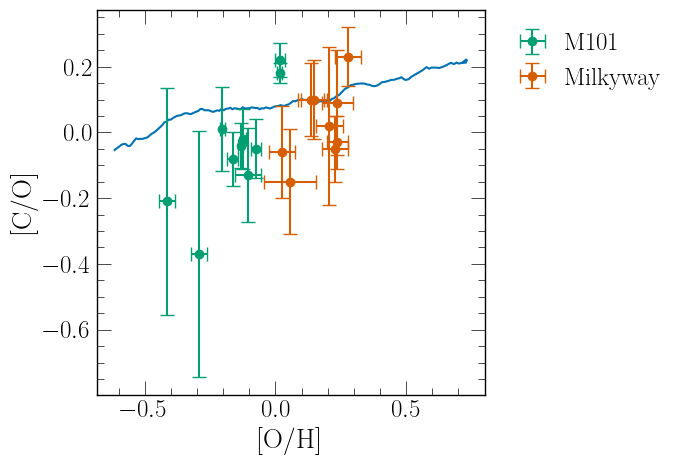

In [145]:
fiducial.plot_gas("[o/h]", "[c/o]")
plt.xlabel("[O/H]")
plt.ylabel("[C/O]")
sf("cooh_gas")


In [146]:
import gas_phase_data

In [147]:
sk = gas_phase_data.read_skillman20()

In [148]:
md = gas_phase_data.read_md22()

In [149]:
a = md.append(sk)

In [204]:
all

,[o/h],[c/h],[n/h],[c/n],[c/o],[n/o],[o/h]_err,[c/o]_err,[n/o]_err,[c/n]_err
0,0.026708,-0.033344,-0.013142,-0.020201,-0.060051,-0.03985,0.05,0.1400,0.11,0.150000
1,0.056708,-0.093344,-0.143142,0.049799,-0.150051,-0.19985,0.10,0.1600,0.20,0.160000
2,0.236708,0.206656,0.166858,0.039799,-0.030051,-0.06985,0.04,0.0800,0.13,0.130000
3,0.146708,0.246656,0.216858,0.029799,0.099949,0.07015,0.05,0.1200,0.19,0.210000
4,0.136708,0.236656,0.256858,-0.020201,0.099949,0.12015,0.05,0.1100,0.10,0.110000
5,0.236708,0.326656,0.426858,-0.100201,0.089949,0.19015,0.06,0.1600,0.13,0.170000
6,0.276708,0.506656,0.256858,0.249799,0.229949,-0.01985,0.05,0.0900,0.15,0.140000
7,0.206708,0.226656,0.206858,0.019799,0.019949,0.00015,0.05,0.2400,0.55,0.690000
8,0.226708,0.176656,0.326858,-0.150201,-0.050051,0.10015,0.05,0.1000,0.19,0.190000
0,0.016708,NaN,NaN,0.319799,0.219949,-0.09985,0.02,0.0525,0.15,0.068571


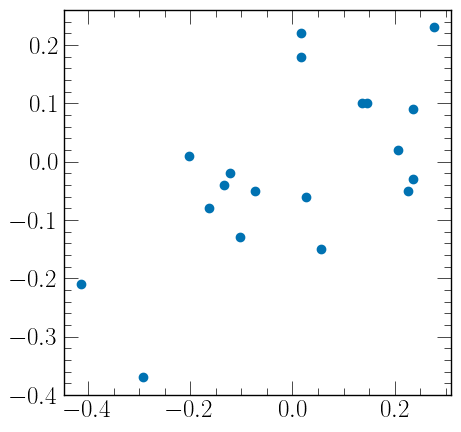

In [206]:
plt.scatter(all["[o/h]"], all["[c/o]"])

In [105]:
from scipy.optimize import curve_fit

In [106]:
def curve(x, m, b):
    return m*x + b

In [108]:
popt, pcov = curve_fit(curve, a["[o/h]"], a["[c/o]"], sigma=a["[c/o]_err"])

In [109]:
popt

array([0.30765335, 0.0871572 ])

In [214]:
pcov**0.5

array([[0.22449519,        nan],
       [       nan, 0.02811683]])

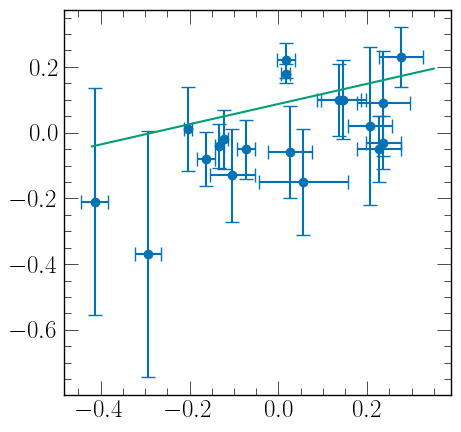

In [220]:
plt.errorbar(all["[o/h]"], all["[c/o]"], yerr=all["[c/o]_err"], xerr=all["[o/h]_err"], fmt="o")

x = np.linspace(-0.42, 0.35)
y = curve(x, *popt)
plt.plot(x, y)
m, b = popt

In [223]:
err_m = pcov[0][0]**0.5
err_b = pcov[0][0]**0.5

In [82]:
df = fiducial.history[fiducial.history. R < 15]
df = df[df["time"] == 13.20]


def get_pred(o_h):
    return df.iloc[(df['[o/h]']-o_h).abs().argsort()[:1]]["[c/o]"]

In [122]:
s = 0

for _, row in a.iterrows():

    o_h = float(row["[o/h]"])
    dev = get_pred(row["[o/h]"]) - row["[c/o]"]
    dev = curve(o_h, *popt)
    err = row["[c/o]_err"]
    ds = float(dev**2/err**2)
    s += ds


In [151]:
get_pred(0)

103037    0.077902
Name: [c/o], dtype: float64

In [156]:
df[(df.R == 8)]

,time,mgas,mstar,sfr,ifr,ofr,eta_0,r_eff,z_in(fe),z_in(o),...,[o/fe],[n/fe],[n/o],[c/fe],[c/o],[c/n],z,[m/h],lookback,R
107000,13.2,84444020.0,265439200.0,0.025495,0.067138,0.055359,2.171375,0.499542,0.0,0.0,...,-0.033789,-0.14224,-0.108451,0.038381,0.07217,0.180621,0.013873,-0.003966,0.0,8.0


In [157]:
df.iloc[(df["[o/h]"].abs().argsort()[:2])]

,time,mgas,mstar,sfr,ifr,ofr,eta_0,r_eff,z_in(fe),z_in(o),...,[o/fe],[n/fe],[n/o],[c/fe],[c/o],[c/n],z,[m/h],lookback,R
103037,13.2,83679920.0,271406900.0,0.027235,0.068592,0.055079,2.022378,0.475822,0.0,0.0,...,-0.033630,-0.118340,-0.084710,0.044272,0.077902,0.162612,0.014752,0.022733,0.0,7.7
104358,13.2,83955180.0,261824300.0,0.026655,0.067699,0.055207,2.071131,0.495565,0.0,0.0,...,-0.034349,-0.124631,-0.090283,0.042999,0.077347,0.167630,0.014451,0.013783,0.0,7.8


In [ ]:
arr = fiducial.history[]
def get_value(name, i=-1):
    return np.array([out.zones["zone%i" % (int(10*j))].history[name][i] for j in R])[6:]

In [232]:
h = fiducial.history[fiducial.history.R == 7.8]
h0 = h[h.time == 13.2]
h1 = h[h.time == 13.1]
eta = h0.eta_0
r = h0.r_eff
sfr = h0.sfr
Mg = h0.mgas
tau_star = Mg/(sfr * 10**9)
dt = 0.1

Mg_dot = (h0["mgas"] - float(h1["mgas"]))/dt
tau_sfh = - float(Mg/Mg_dot)

In [254]:
def calc_y(model):
    df = model.history[model.history. R < 15]
    df = df[df["time"] == 13.20]
    
    h = model.history[model.history.R == 7.8]
    h0 = h[h.time == 13.2]
    h1 = h[h.time == 13.1]
    eta = h0.eta_0
    r = h0.r_eff
    sfr = h0.sfr
    Mg = h0.mgas
    tau_star = Mg/(sfr * 10**9)
    dt = 0.1

    Mg_dot = (h0["mgas"] - float(h1["mgas"]))/dt
    tau_sfh = - float(Mg/Mg_dot)


    def get_pred(o_h):
        return df.iloc[(df['[o/h]']).abs().argsort()[:1]]["[c/h]"]
    c_h = df[df["R"] == 7.8]["[c/h]"]
    c = aah.bracket_to_abundance(c_h, "c")
    
    print(h0["[o/h]"])
    y = c*float(1+eta-r - tau_star/tau_sfh) - 0.005
    return y
    

In [255]:
names = []
for s in ["fiducial", "k10", "v13", "k16"]:
    names.append(model_id(name=s))
labels = ["C11", "K10", "V13", "K16"]
models = {label: find_model(name) for name, label in zip(names, labels)}

for name, model in models.items():
    print(name)
    print(calc_y(model)*1e4)

C11
104358    0.045868
Name: [o/h], dtype: float64
104358    4.046793
Name: [c/h], dtype: float64
K10
104358    0.003988
Name: [o/h], dtype: float64
104358    6.434657
Name: [c/h], dtype: float64
V13
104358    0.003115
Name: [o/h], dtype: float64
104358    2.138206
Name: [c/h], dtype: float64
K16
104358    0.006999
Name: [o/h], dtype: float64
104358    4.038241
Name: [c/h], dtype: float64


In [239]:
calc_y(fiducial)

103037    0.002257
Name: [c/h], dtype: float64